In [1]:
import pylab
import numpy as np

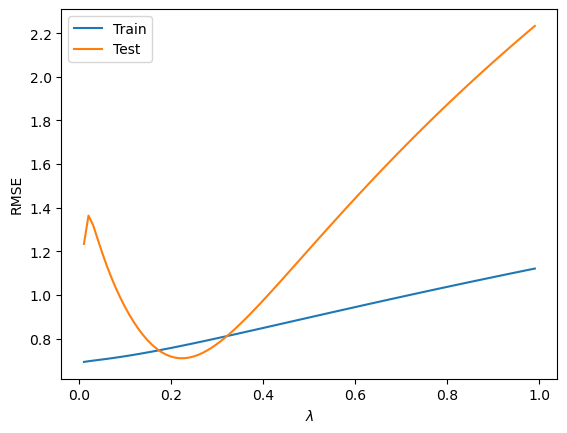

In [3]:
x = np.linspace(-1, 1, 100)
signal = 2 + x + 2 * x * x
noise = np.random.normal(0, 0.1, 100)
y = signal + noise
x_train = x[0:80]
y_train = y[0:80]

train_rmse = []
test_rmse = []
degree = 80
lambda_reg_values = np.linspace(0.01, 0.99, 100)

for lambda_reg in lambda_reg_values:
    X_train = np.column_stack([np.power(x_train,i) for i in range(0, degree)])
    model = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(), X_train) + lambda_reg * np.identity(degree)), X_train.transpose()), y_train)
    predicted = np.dot(model, [np.power(x, i) for i in range(0, degree)])
    train_rmse.append(np.sqrt(np.sum(np.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))))
    test_rmse.append(np.sqrt(np.sum(np.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))))

pylab.plot(lambda_reg_values, train_rmse)
pylab.plot(lambda_reg_values, test_rmse)
pylab.xlabel(r"$\lambda$")
pylab.ylabel("RMSE")
pylab.legend(["Train","Test"], loc=2)

